# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | rocha
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | itarema
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | hualmay
Processing Record 10 of Set 1 | grand baie
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | ginir
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | chaah
Processing Record 21 of Set 1 | shatsk
Processing Record 22 of Set 1 | butaritari
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dunedin,-45.8742,170.5036,53.80,92,100,4.00,NZ,1671592195
1,naze,28.3667,129.4833,64.45,69,100,15.68,JP,1671592324
2,rocha,-34.4833,-54.3333,58.46,94,0,5.70,UY,1671592325
3,iqaluit,63.7506,-68.5145,-2.31,77,92,10.00,CA,1671592326
4,upernavik,72.7868,-56.1549,9.05,96,100,14.56,GL,1671592326


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dunedin,-45.8742,170.5036,53.80,92,100,4.00,NZ,1671592195
1,naze,28.3667,129.4833,64.45,69,100,15.68,JP,1671592324
2,rocha,-34.4833,-54.3333,58.46,94,0,5.70,UY,1671592325
3,iqaluit,63.7506,-68.5145,-2.31,77,92,10.00,CA,1671592326
4,upernavik,72.7868,-56.1549,9.05,96,100,14.56,GL,1671592326


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

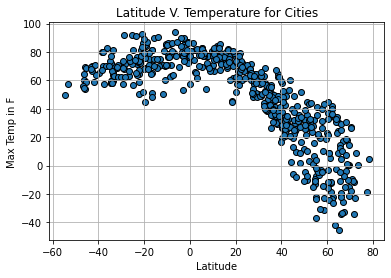

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Temperature for Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
plt.grid(True)

# Save the figure
#plt.savefig("Resources/Latitude V. Temperature for Cities.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

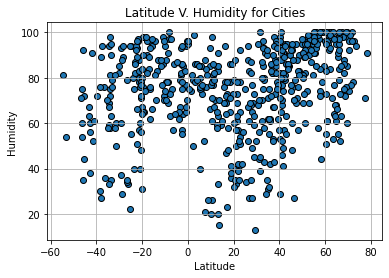

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Humidity for Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
#plt.savefig("Resources/Latitude V. Humidity for Cities.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

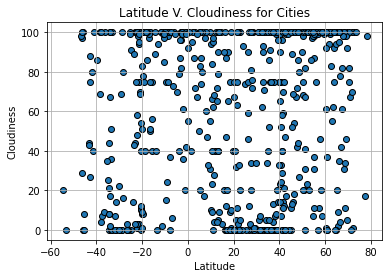

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Cloudiness for Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
#plt.savefig("Resources/Latitude V. Cloudiness for Cities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

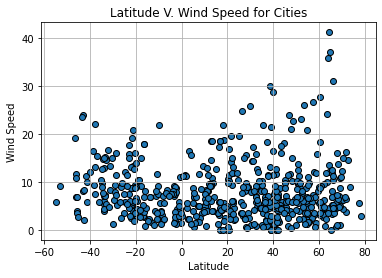

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, alpha=1.0)

# Incorporate the other graph properties
plt.title("Latitude V. Wind Speed for Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Latitude V. Wind Speed for Cities.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemis_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,naze,28.3667,129.4833,64.45,69,100,15.68,JP,1671592324
3,iqaluit,63.7506,-68.5145,-2.31,77,92,10.00,CA,1671592326
4,upernavik,72.7868,-56.1549,9.05,96,100,14.56,GL,1671592326
7,sisimiut,66.9395,-53.6735,17.13,63,42,4.34,GL,1671592328
10,jamestown,42.0970,-79.2353,25.72,57,0,4.61,US,1671592330


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemis_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dunedin,-45.8742,170.5036,53.80,92,100,4.00,NZ,1671592195
2,rocha,-34.4833,-54.3333,58.46,94,0,5.70,UY,1671592325
5,itarema,-2.9248,-39.9167,77.83,81,100,8.43,BR,1671592327
6,port alfred,-33.5906,26.8910,59.18,95,100,7.20,ZA,1671592327
8,hualmay,-11.0964,-77.6139,70.20,86,100,7.02,PE,1671592328


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8641146002552234


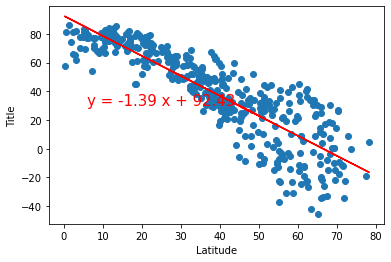

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemis_df ["Lat"]
y_values = northern_hemis_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))
# plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# plt.legend(['Max Temperature'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')

The r-squared is: 0.47424742016344257


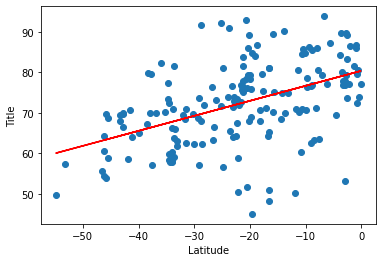

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemis_df ["Lat"]
y_values = southern_hemis_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))
# plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
# plt.legend(['Max Temperature'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')

**Discussion about the linear relationship:** There is a very strong correlation between lattitude and temperature. For the Southern Hemisphere, there is a moderately positive relationship between the temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.38412234389639327


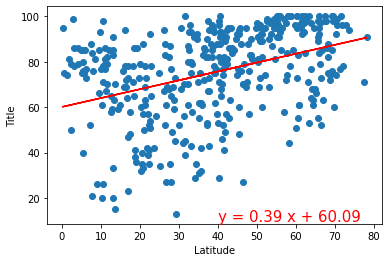

In [21]:
# Northern Hemisphere
x_values = northern_hemis_df ["Lat"]
y_values = northern_hemis_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))
# plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
# plt.legend(['Humidity'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Humidity (%)')

The r-squared is: 0.3098971586848812


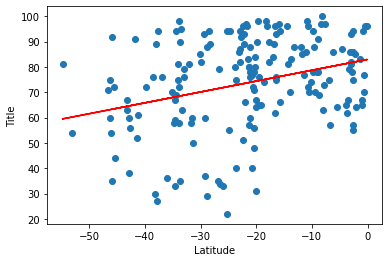

In [22]:
# Southern Hemisphere
x_values = southern_hemis_df ["Lat"]
y_values = southern_hemis_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))
# plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
# plt.legend(['Humidity (%)'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** There is a weak correlation between humidity and latitude. The r-value is low enough to have no correlation whatsoever.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.16956924413763155


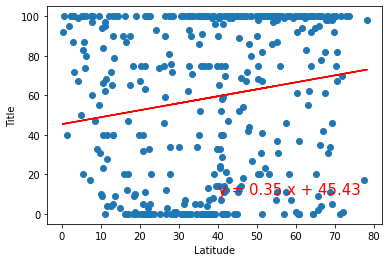

In [23]:
# Northern Hemisphere
x_values = northern_hemis_df ["Lat"]
y_values = northern_hemis_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))
# plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
# plt.legend(['Cloudiness (%)'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness (%)')

The r-squared is: 0.33588456628026797


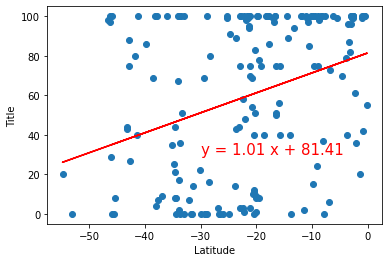

In [24]:
# Southern Hemisphere
x_values = southern_hemis_df ["Lat"]
y_values = southern_hemis_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))
# plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
# plt.legend(['Cloudiness (%)'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness (%)')

**Discussion about the linear relationship:** There is little to no correlation between cloudiness and latitude, based on the Northern and Southern plots.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.07082679983537067


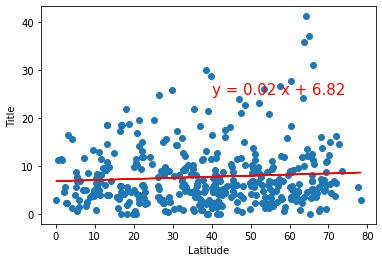

In [25]:
# Northern Hemisphere
x_values = northern_hemis_df ["Lat"]
y_values = northern_hemis_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))
# plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# plt.legend(['Wind Speed (mph)'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed (mph)')

The r-squared is: -0.3424781340588243


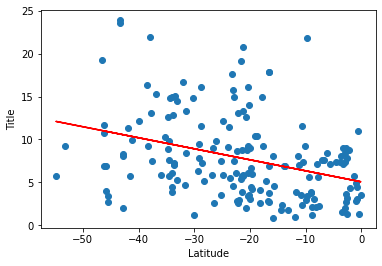

In [26]:
# Southern Hemisphere
x_values = southern_hemis_df ["Lat"]
y_values = southern_hemis_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))
# plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
# plt.legend(['Wind Speed (mph)'], loc='upper right')
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed (mph)')

**Discussion about the linear relationship:** For the two plots above, there seems to be no correlation between wind speed and latitude in the Nothern hemisphere, however, in the Southern hemisphere, the correlation is weak, but shows that wind speed and latitude do have a weak relationship. 